In [3]:
!unzip '/content/mimic.zip'

Archive:  /content/mimic.zip
  inflating: PRESCRIPTIONS.csv       


In [4]:
import pandas as pd
df = pd.read_csv('/content/PRESCRIPTIONS.csv')
df.head()

<ipython-input-4-f2d8a213b895>:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/PRESCRIPTIONS.csv')


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
0,2214776,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Tacrolimus,Tacrolimus,Tacrolimus,TACR1,021796,469061711.0,1mg Capsule,2,mg,2,CAP,PO
1,2214775,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Warfarin,Warfarin,Warfarin,WARF5,006562,56017275.0,5mg Tablet,5,mg,1,TAB,PO
2,2215524,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Heparin Sodium,NaN,NaN,HEPAPREMIX,006522,338055002.0,"25,000 unit Premix Bag","25,000",UNIT,1,BAG,IV
3,2216265,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,BASE,D5W,NaN,NaN,HEPBASE,NaN,0.0,HEPARIN BASE,250,ml,250,ml,IV
4,2214773,6,107064,NaN,2175-06-11 00:00:00,2175-06-12 00:00:00,MAIN,Furosemide,Furosemide,Furosemide,FURO20,008208,54829725.0,20mg Tablet,20,mg,1,TAB,PO


In [5]:
df = df.dropna()

In [6]:
df.head()

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTDATE,ENDDATE,DRUG_TYPE,DRUG,DRUG_NAME_POE,DRUG_NAME_GENERIC,FORMULARY_DRUG_CD,GSN,NDC,PROD_STRENGTH,DOSE_VAL_RX,DOSE_UNIT_RX,FORM_VAL_DISP,FORM_UNIT_DISP,ROUTE
30,2122377,13,143045,263738.0,2167-01-09 00:00:00,2167-01-09 00:00:00,MAIN,Midazolam HCl,Midazolam HCl,Midazolam HCl,MIDA2I,003779,7.425870e+07,2MG/2ML VIAL,2,mg,2,ml,IV
31,2122379,13,143045,263738.0,2167-01-09 00:00:00,2167-01-09 00:00:00,MAIN,Nitroglycerin SL,Nitroglycerin SL,Nitroglycerin SL,NTG3SL,000474,5.817703e+10,0.3MG SL TAB,0.3,mg,1,TAB,SL
32,2122378,13,143045,263738.0,2167-01-09 00:00:00,2167-01-09 00:00:00,MAIN,Lorazepam,Lorazepam,Lorazepam,LORA2I,003753,8.058107e+06,2MG/ML SYR,1,mg,0.5,ml,IV
33,2122376,13,143045,263738.0,2167-01-09 00:00:00,2167-01-09 00:00:00,MAIN,Magnesium Sulfate,Magnesium Sulfate,Magnesium Sulfate,MAGS1I,001412,7.440753e+07,1gm/2ml vial,2,gm,4,ml,IV
34,2122375,13,143045,263738.0,2167-01-09 00:00:00,2167-01-09 00:00:00,MAIN,Potassium Chloride,Potassium Chloride,Potassium Chloride,MICROK10,001248,5.817700e+10,10mEq ER,40,mEq,4,CAP,PO


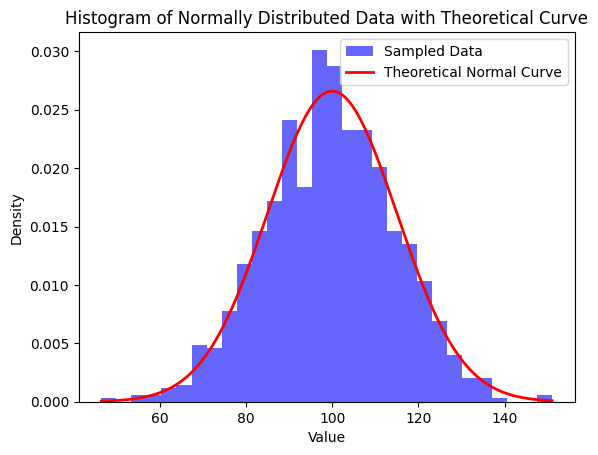

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Step 1: Generate normally distributed data
mean = 100
std_dev = 15
samples = np.random.normal(mean, std_dev, 1000)

# Step 2: Plot histogram
plt.hist(samples, bins=30, density=True, alpha=0.6, color='b', label='Sampled Data')

# Step 3: Overlay the theoretical normal distribution curve
x = np.linspace(min(samples), max(samples), 1000)
pdf = stats.norm.pdf(x, mean, std_dev)
plt.plot(x, pdf, 'r', linewidth=2, label='Theoretical Normal Curve')

# Labels and title
plt.xlabel('Value')
plt.ylabel('Density')
plt.title('Histogram of Normally Distributed Data with Theoretical Curve')
plt.legend()

# Show plot
plt.show()


In [8]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis

# 2. Select a continuous numerical variable
variable = 'DOSE_VAL_RX'


data = pd.to_numeric(df[variable], errors='coerce').dropna()


# 4. Compute summary statistics
if data.size > 0:
    mean_value = np.mean(data)
    std_dev = np.std(data)
    skewness = skew(data)
    kurt = kurtosis(data)

    # 5. Print the results
    print(f"Summary Statistics for {variable}:")
    print(f"Mean: {mean_value:.2f}")
    print(f"Standard Deviation: {std_dev:.2f}")
    print(f"Skewness: {skewness:.2f}")
    print(f"Kurtosis: {kurt:.2f}")
else:
    print(f"No data available for '{variable}' after handling missing values.")

Summary Statistics for DOSE_VAL_RX:
Mean: 189.70
Standard Deviation: 726.66
Skewness: 8.16
Kurtosis: 177.72


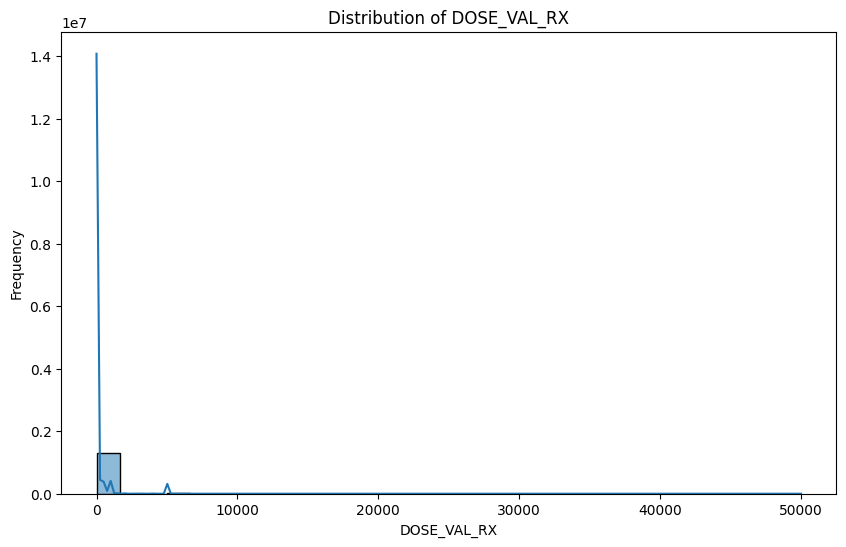

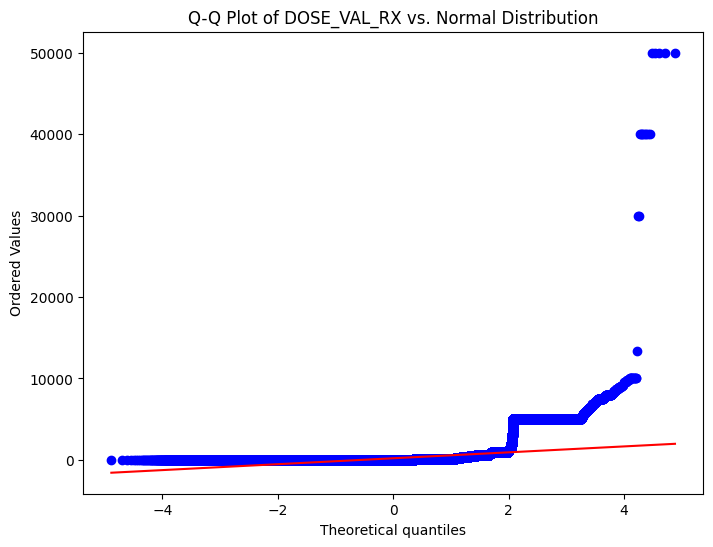

Shapiro-Wilk Test for DOSE_VAL_RX:
Statistic: 0.250
P-value: 0.000
Data does not appear to be normally distributed (reject H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1337056.
  res = hypotest_fun_out(*samples, **kwds)


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


if data.size > 3:

    plt.figure(figsize=(10, 6))
    sns.histplot(data, kde=True, bins=30)
    plt.title(f'Distribution of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.show()

    # 5. Q-Q plot
    plt.figure(figsize=(8, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {variable} vs. Normal Distribution')
    plt.show()

    # 6. Shapiro-Wilk test
    statistic, p_value = stats.shapiro(data)
    print(f"Shapiro-Wilk Test for {variable}:")
    print(f"Statistic: {statistic:.3f}")
    print(f"P-value: {p_value:.3f}")

    # Interpret Shapiro-Wilk results
    alpha = 0.05
    if p_value > alpha:
        print(f"Data appears to be normally distributed (fail to reject H0)")
    else:
        print(f"Data does not appear to be normally distributed (reject H0)")
else:
    print(f"Insufficient data for normality tests for '{variable}'")

In [10]:

from scipy.stats import norm


threshold = 10  # Example threshold: heart rate less than 10

# 2. Extract data and handle missing values
data = pd.to_numeric(df[variable], errors='coerce').dropna()

# 3. Calculate mean and standard deviation
mean_value = np.mean(data)
std_dev = np.std(data)

# 4. Compute the probability using norm.cdf()
probability = norm.cdf(threshold, loc=mean_value, scale=std_dev)

# 5. Print the result
print(f"Probability of {variable} being less than {threshold}: {probability:.4f}")

Probability of DOSE_VAL_RX being less than 10: 0.4023


In [12]:

percentile = 0.90

# Calculate mean and standard deviation
mean_value = np.mean(data)
std_dev = np.std(data)

# Compute the quantile using norm.ppf()
quantile_value = norm.ppf(percentile, loc=mean_value, scale=std_dev)

#Print the result
print(f"{percentile*100:.0f}th percentile of {variable}: {quantile_value:.2f}")

# Interpretation in clinical context (example)
print("\nClinical Interpretation:")
print(f"90% of patients have a {variable} value less than or equal to {quantile_value:.2f}.")
# Replace with a meaningful interpretation for your specific data.

90th percentile of DOSE_VAL_RX: 1120.95

Clinical Interpretation:
90% of patients have a DOSE_VAL_RX value less than or equal to 1120.95.


In [13]:
import pandas as pd
import numpy as np
from scipy.stats import norm

value_to_evaluate = 10  # Example value: DOSE_VAL_RX = 10

# Calculate mean and standard deviation
mean_value = np.mean(data)
std_dev = np.std(data)

# Compute the PDF using norm.pdf()
pdf_value = norm.pdf(value_to_evaluate, loc=mean_value, scale=std_dev)

# Print the result
print(f"PDF of {variable} at {value_to_evaluate}: {pdf_value:.4f}")

# Interpretation of the PDF value
print("\nInterpretation:")
print(f"The PDF value represents the relative likelihood of observing a {variable} value of {value_to_evaluate}.")
print("It is not a probability itself, but rather a measure of the density of the distribution at that point.")

PDF of DOSE_VAL_RX at 10: 0.0005

Interpretation:
The PDF value represents the relative likelihood of observing a DOSE_VAL_RX value of 10.
It is not a probability itself, but rather a measure of the density of the distribution at that point.


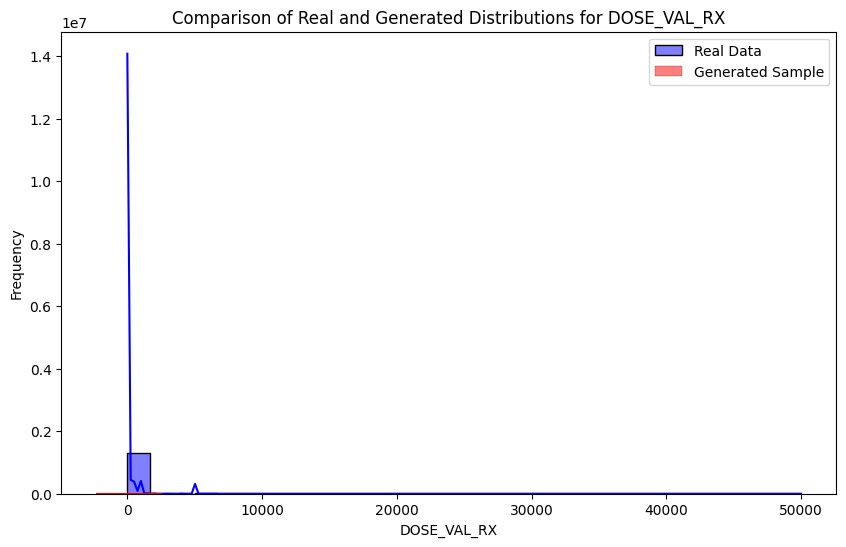

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns


#  Calculate mean and standard deviation of real data
mean_real = np.mean(data)
std_real = np.std(data)

#  Generate random normal sample
sample_size = 1000
random_sample = norm.rvs(loc=mean_real, scale=std_real, size=sample_size)

# Plot and compare distributions
plt.figure(figsize=(10, 6))

# Real data distribution
sns.histplot(data, kde=True, bins=30, label='Real Data', color='blue')

# Generated sample distribution
sns.histplot(random_sample, kde=True, bins=30, label='Generated Sample', color='red')

plt.title(f'Comparison of Real and Generated Distributions for {variable}')
plt.xlabel(variable)
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [15]:
#step 1
import pandas as pd
import numpy as np
import scipy.stats as stats

# Calculate the confidence interval
confidence_level = 0.95
degrees_of_freedom = len(data) - 1  # Degrees of freedom for t-distribution
sample_mean = np.mean(data)
sample_standard_error = stats.sem(data)  # Standard error of the mean

confidence_interval = stats.t.interval(
    confidence_level,
    degrees_of_freedom,
    loc=sample_mean,
    scale=sample_standard_error
)

# 4. Print the results
print(f"95% Confidence Interval for the mean of {variable}:")
print(confidence_interval)

95% Confidence Interval for the mean of DOSE_VAL_RX:
(188.46944455821904, 190.9328487456889)


In [16]:
import pandas as pd
import numpy as np
import scipy.stats as stats


# Calculate the confidence interval
confidence_level = 0.95  # 95% confidence level
degrees_of_freedom = len(data) - 1
sample_mean = np.mean(data)
sample_standard_error = stats.sem(data)

confidence_interval = stats.t.interval(
    confidence_level,
    degrees_of_freedom,
    loc=sample_mean,
    scale=sample_standard_error
)

# Print the results
print(f"95% Confidence Interval for the mean of Systolic Blood Pressure: {confidence_interval}")


95% Confidence Interval for the mean of Systolic Blood Pressure: (188.46944455821904, 190.9328487456889)


In [19]:

# Calculate mean and standard deviation
mean_value = np.mean(data)
std_dev = np.std(data)

# Value to evaluate (systolic blood pressure = 150 mmHg)
value_to_evaluate = 150

# Calculate the probability using 1 - norm.cdf()
probability = 1 - norm.cdf(value_to_evaluate, loc=mean_value, scale=std_dev)

# Print the result
print(f"Probability of Systolic Blood Pressure being greater than {value_to_evaluate} mmHg: {probability:.4f}")

Probability of Systolic Blood Pressure being greater than 150 mmHg: 0.5218
